In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

C:\Users\Delmas Clément\AppData\Local\Temp\ipykernel_26360\2269372324.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Charger les données
data = pd.read_excel("resultats-par-niveau-subcom-t2-france-entiere.xlsx")
#print(data.head())

In [3]:
# Filtrer les données pour votre commune spécifique
commune = data['Libellé de la commune']
# Charger les données des élections présidentielles pour cette commune
donnees_elections = {
    "MACRON Emmanuel": data['% Voix/Exp'],
    "LE PEN Marine": data.iloc[:, -1]
}

In [4]:
france_map = gpd.read_file('Carte/communes-20220101.shp')

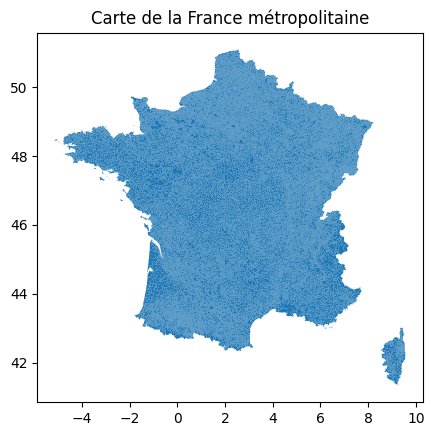

In [5]:
# Filtrer les données pour n'inclure que la France métropolitaine
france_metrop = france_map[~france_map['insee'].str.startswith(('97', '98'))]

# Afficher la carte de la France métropolitaine
fig, ax = plt.subplots()
france_metrop.plot(ax=ax)
ax.set_title('Carte de la France métropolitaine')
plt.show()


971


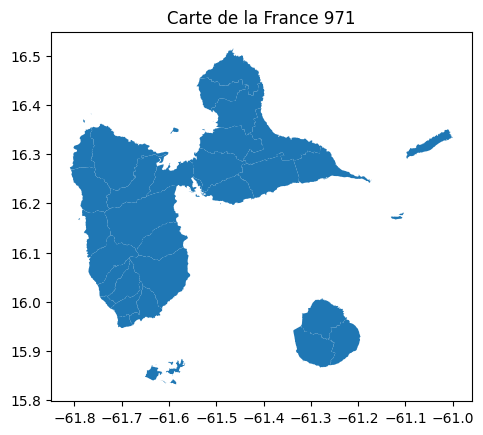

972


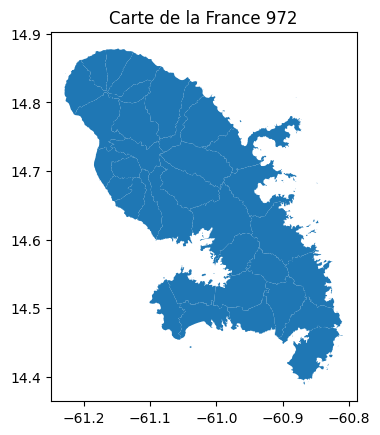

973


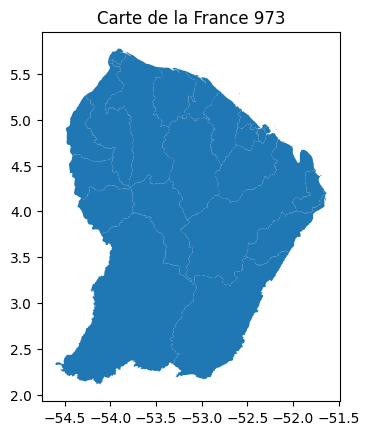

974


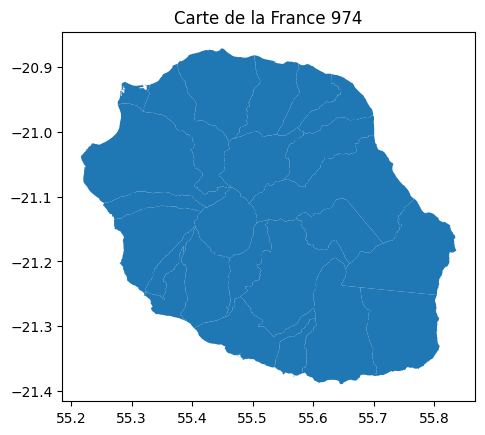

976


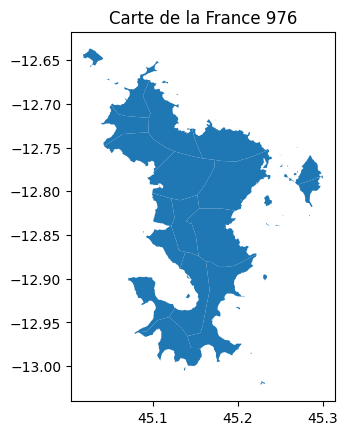

In [6]:

def afficherCarteDOMTOM():
    #Liste Dom Tom complet
    #ListDomTom= ['971','972','973', '974', '975', '976', '977', '978', '986', '987', '988', '984', '989']
    #Liste Dom Tom qui sont non null
    ListDomTom= ['971','972','973', '974','976']
    for i in ListDomTom:
        print (i)
        domtom = france_map[france_map['insee'].str.startswith(i)]
        fig, ax = plt.subplots()
        domtom.plot(ax=ax)
        ax.set_title('Carte de la France '+ i)
        plt.show()
afficherCarteDOMTOM()

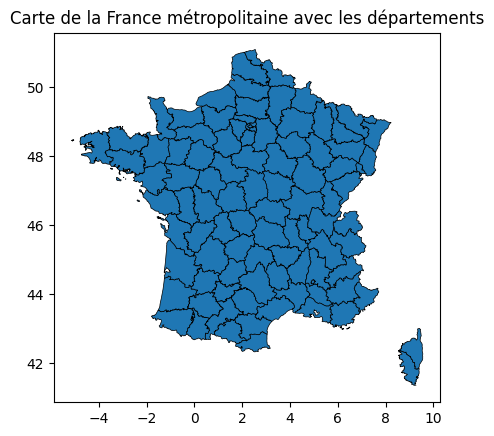

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Filtrer les données pour n'inclure que la France métropolitaine
france_metrop = departements[~departements['code'].str.startswith(('97', '98'))]

# Afficher la carte de la France métropolitaine avec les départements
fig, ax = plt.subplots()
france_metrop.plot(ax=ax, edgecolor='k', linewidth=0.5) # Couleur des contours et épaisseur des lignes
ax.set_title('Carte de la France métropolitaine avec les départements')
plt.show()


  Unnamed: 0              Departement  Ensemble  Hommes  Femmes  15-24 ans  \
0         01                      Ain       5.5     5.3     5.6       13.2   
1         02                    Aisne      10.5    10.5    10.4       27.9   
2         03                   Allier       7.7     7.9     7.4       19.0   
3         04  Alpes-de-Haute-Provence       8.2     8.3     8.2       21.2   
4         05             Hautes-Alpes       6.9     7.1     6.7       17.0   

   25-49 ans  50 ans ou plus  
0        5.0             3.9  
1        8.9             7.1  
2        6.7             5.7  
3        7.9             5.5  
4        6.8             4.5  


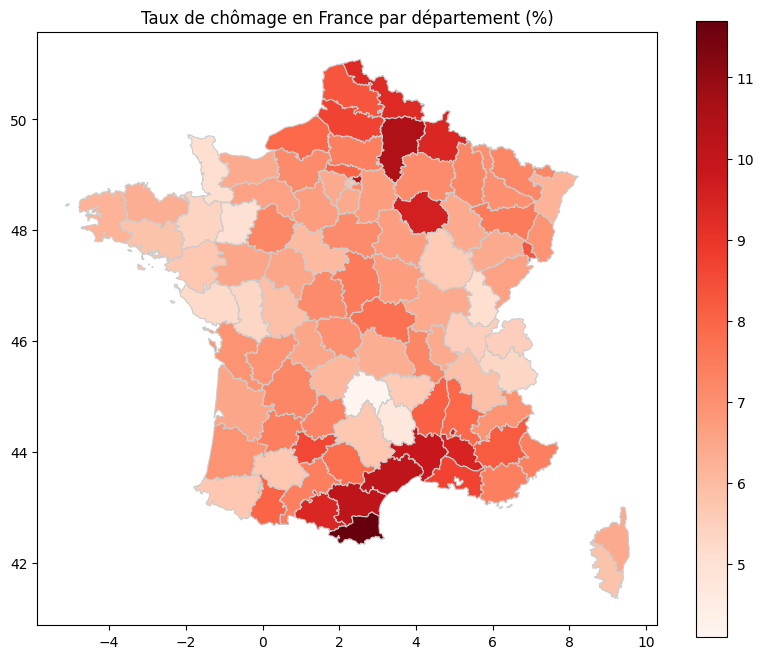

In [8]:
#Taux de chaumage par departement

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_tauchomage = pd.read_excel('AutreData/tauxChomage.xlsx')

print(df_tauchomage.head())
# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de taux de chômage avec les données géographiques des départements
departements = departements.merge(df_tauchomage, left_on='code', right_on='Unnamed: 0')

# Afficher la carte de la France par département avec une heatmap des valeurs de taux de chômage
fig, ax = plt.subplots(figsize=(10, 8))
departements.plot(column='Ensemble', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Taux de chômage en France par département (%)')
plt.show()





  Code du département Libellé du département  Code de la circonscription  \
0                  01                    Ain                           4   
1                  01                    Ain                           5   
2                  01                    Ain                           5   
3                  01                    Ain                           5   
4                  01                    Ain                           5   

  Libellé de la circonscription  Code de la commune    Libellé de la commune  \
0          4ème circonscription                   1  L'Abergement-Clémenciat   
1          5ème circonscription                   2    L'Abergement-de-Varey   
2          5ème circonscription                   4        Ambérieu-en-Bugey   
3          5ème circonscription                   4        Ambérieu-en-Bugey   
4          5ème circonscription                   4        Ambérieu-en-Bugey   

  Code du b.vote  Inscrits  Abstentions  % Abs/Ins  ...  Unnam

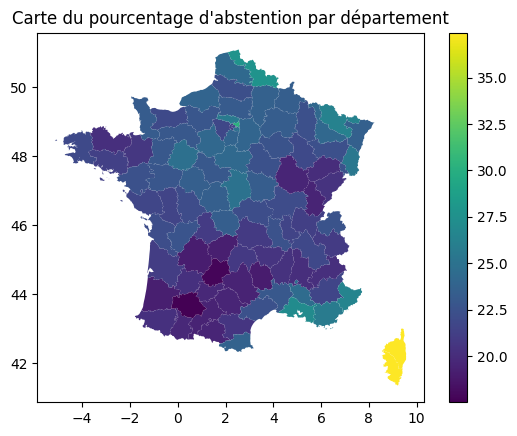

In [9]:
#Abstention 1er tour
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_abstention = pd.read_excel('AutreData/resultats-par-niveau-burvot-t1-france-entiere.xlsx')
print(df_abstention.head())


# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Calculer la moyenne du pourcentage d'abstention pour chaque département
abstention_moyenne_par_departement = df_abstention.groupby('Code du département')['% Abs/Ins'].mean().reset_index()

# Renommer les colonnes pour la fusion
abstention_moyenne_par_departement = abstention_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Abs/Ins': 'Pourcentage_Abstention'})

# Fusionner les données d'abstention avec les données géographiques des départements
departements = departements.merge(abstention_moyenne_par_departement, on='code')

# Afficher la carte avec les données d'abstention
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Abstention', ax=ax, legend=True)
ax.set_title("Carte du pourcentage d'abstention par département")
plt.show()


  Code du département Libellé du département  Code de la commune  \
0                  01                    Ain                   1   
1                  01                    Ain                   2   
2                  01                    Ain                   4   
3                  01                    Ain                   5   
4                  01                    Ain                   6   

     Libellé de la commune Etat saisie  Inscrits  Abstentions  % Abs/Ins  \
0  L'Abergement-Clémenciat     Complet       643          146      22.71   
1    L'Abergement-de-Varey     Complet       213           45      21.13   
2        Ambérieu-en-Bugey     Complet      8763         2448      27.94   
3      Ambérieux-en-Dombes     Complet      1282          266      20.75   
4                  Ambléon     Complet       103           19      18.45   

   Votants  % Vot/Ins  ...  Voix  % Voix/Ins  % Voix/Exp  Unnamed: 26  \
0      497      77.29  ...   237       36.86       52.67     

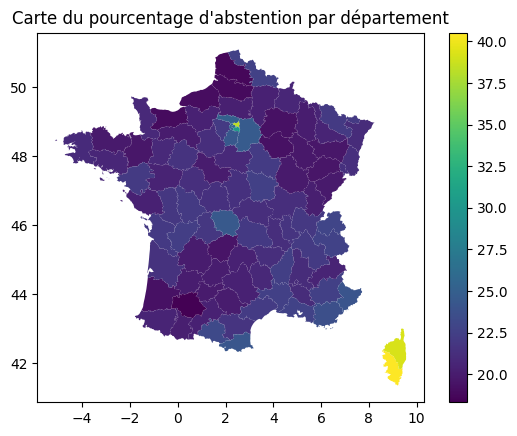

In [10]:
#Abstention 1er tour
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_abstention = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')
print(df_abstention.head())


# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Calculer la moyenne du pourcentage d'abstention pour chaque département
abstention_moyenne_par_departement = df_abstention.groupby('Code du département')['% Abs/Ins'].mean().reset_index()

# Renommer les colonnes pour la fusion
abstention_moyenne_par_departement = abstention_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Abs/Ins': 'Pourcentage_Abstention'})

# Fusionner les données d'abstention avec les données géographiques des départements
departements = departements.merge(abstention_moyenne_par_departement, on='code')

# Afficher la carte avec les données d'abstention
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Abstention', ax=ax, legend=True)
ax.set_title("Carte du pourcentage d'abstention par département")
plt.show()


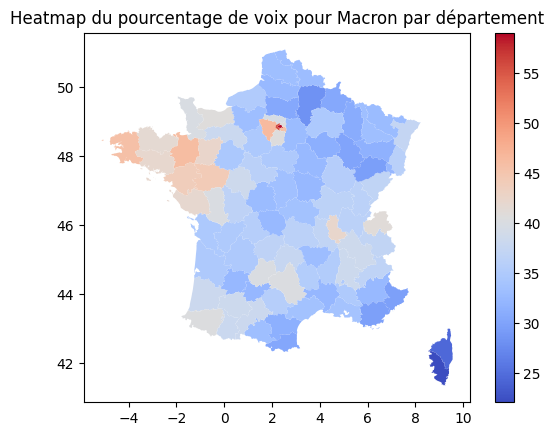

In [11]:
#Heatmap Macron
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')

# Sélectionner les colonnes pertinentes
df_macron = df_resultats[['Code du département', '% Voix/Ins']]

# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
macron_moyenne_par_departement = df_macron.groupby('Code du département')['% Voix/Ins'].mean().reset_index()

# Renommer les colonnes pour la fusion
macron_moyenne_par_departement = macron_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins': 'Pourcentage_Macron'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(macron_moyenne_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Macron', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage de voix pour Macron par département")
plt.show()


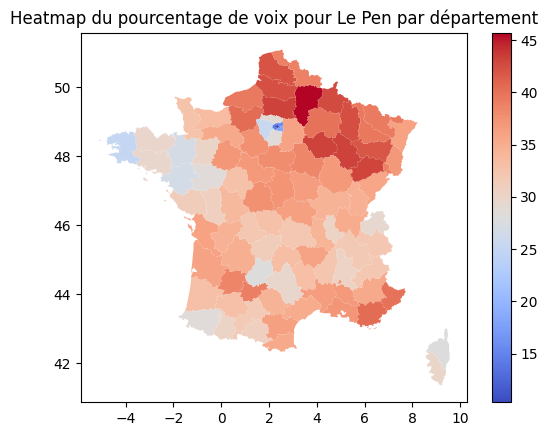

In [12]:
#Heatmap Le Pen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')

# Sélectionner les colonnes pertinentes
df_lepen = df_resultats[['Code du département', '% Voix/Ins2']]

# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
lepen_moyenne_par_departement = df_lepen.groupby('Code du département')['% Voix/Ins2'].mean().reset_index()

# Renommer les colonnes pour la fusion
lepen_moyenne_par_departement = lepen_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins2': 'Pourcentage_LePenn'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(lepen_moyenne_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_LePenn', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage de voix pour Le Pen par département")
plt.show()


0    45.717572
1    43.222715
2    33.489129
3    33.220000
4    37.592986
Name: Pourcentage_LePen, dtype: float64
0    28.182378
1    31.186056
2    40.763333
3    37.562927
4    34.700986
Name: Pourcentage_Macron, dtype: float64


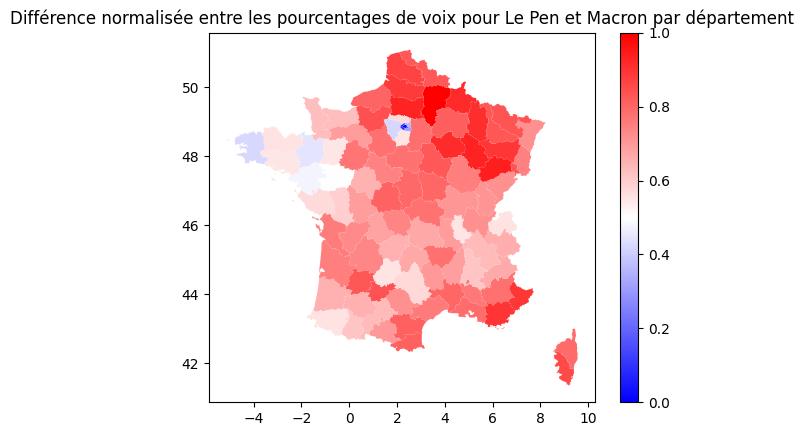

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')

# Sélectionner les colonnes pertinentes pour Macron
df_macron = df_resultats[['Code du département', '% Voix/Ins']]

# Sélectionner les colonnes pertinentes pour Le Pen
df_lepen = df_resultats[['Code du département', '% Voix/Ins2']]

# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
macron_moyenne_par_departement = df_macron.groupby('Code du département')['% Voix/Ins'].mean().reset_index()

# Calculer la moyenne du pourcentage de voix pour Le Pen pour chaque département
lepen_moyenne_par_departement = df_lepen.groupby('Code du département')['% Voix/Ins2'].mean().reset_index()

# Renommer les colonnes pour la fusion
macron_moyenne_par_departement = macron_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins': 'Pourcentage_Macron'})
lepen_moyenne_par_departement = lepen_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins2': 'Pourcentage_LePen'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(macron_moyenne_par_departement, on='code')

# Fusionner les données de pourcentage de voix pour Le Pen avec les données géographiques des départements
departements = departements.merge(lepen_moyenne_par_departement, on='code')

print(departements['Pourcentage_LePen'].head())
print(departements['Pourcentage_Macron'].head())

# Calculer la différence entre les pourcentages de vote pour Le Pen et Macron
departements['Difference_LePen_Macron'] = departements['Pourcentage_LePen'] - departements['Pourcentage_Macron']

# Normaliser la différence pour qu'elle soit dans la plage [0, 1]
departements['Difference_Normalisee'] = (departements['Difference_LePen_Macron'] - departements['Difference_LePen_Macron'].min()) / (departements['Difference_LePen_Macron'].max() - departements['Difference_LePen_Macron'].min())

# Définir une colormap personnalisée allant de bleu à blanc à rouge
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Afficher la heatmap combinée
fig, ax = plt.subplots(1, 1)
departements.plot(column='Difference_Normalisee', cmap=cmap, ax=ax, legend=True)
ax.set_title("Différence normalisée entre les pourcentages de voix pour Le Pen et Macron par département")
plt.show()


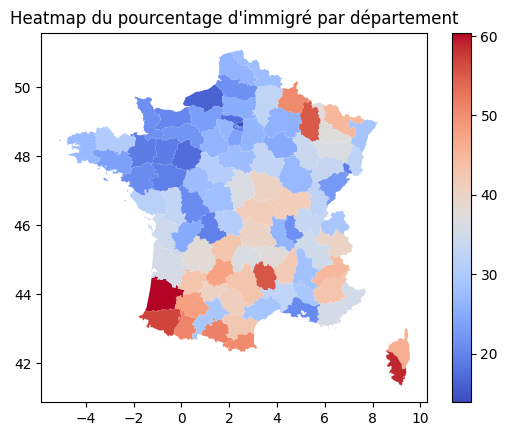

In [20]:
#Heatmap Le Pen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/PopImmigré.xlsx')

# Sélectionner les colonnes pertinentes
df_pourcent_immigre = df_resultats[['Code du département', 'Part des immigrés nés dans l\'Union européenne (en %)']]


# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
pourcent_immigre_par_departement = df_pourcent_immigre.groupby('Code du département')['Part des immigrés nés dans l\'Union européenne (en %)'].mean().reset_index()

# Renommer les colonnes pour la fusion
pourcent_immigre_par_departement = pourcent_immigre_par_departement.rename(columns={'Code du département': 'code', 'Part des immigrés nés dans l\'Union européenne (en %)': 'Pourcentage_Immigre'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(pourcent_immigre_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Immigre', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage d'immigré par département")
plt.show()


In [ ]:
#Heatmap Le Pen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/PopImmigré.xlsx')

# Sélectionner les colonnes pertinentes
df_pourcent_immigre = df_resultats[['Code du département', 'Part des immigrés nés en Algérie (en %)']]


# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
pourcent_immigre_par_departement = df_pourcent_immigre.groupby('Code du département')['Part des immigrés nés en Algérie (en %)'].mean().reset_index()

# Renommer les colonnes pour la fusion
pourcent_immigre_par_departement = pourcent_immigre_par_departement.rename(columns={'Code du département': 'code', 'Part des immigrés nés en Algérie (en %)': 'Pourcentage_Immigre'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(pourcent_immigre_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Immigre', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage d'immigré Algerien par département")
plt.show()
